In [2]:
import numpy as np
import pandas as pd

import seaborn as sns

In [4]:
orders = pd.read_csv('Orders.csv')

In [5]:
returns = pd.read_csv('Returns.csv')

In [28]:
orders.head()

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority
0,40098,CA-2014-AB10015140-41954,11/11/14,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,$221.98,2,0.0,$62.15,40.77,High
1,26341,IN-2014-JR162107-41675,2/5/14,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black","$3,709.40",9,0.1,-$288.77,923.63,Critical
2,25330,IN-2014-CR127307-41929,10/17/14,10/18/14,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID","$5,175.17",9,0.1,$919.97,915.49,Medium
3,13524,ES-2014-KM1637548-41667,1/28/14,1/30/14,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless","$2,892.51",5,0.1,-$96.54,910.16,Medium
4,47221,SG-2014-RH9495111-41948,11/5/14,11/6/14,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed","$2,832.96",8,0.0,$311.52,903.04,Critical


In [6]:
def change_dollar(df, string):
    df[string] = df[string].str.replace('$', '')
    df[string] = df[string].str.replace(',', '')
    df[string] = df[string].apply(lambda x: float(x))
    
    return df

In [7]:
change_dollar(orders, 'Profit')

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority
0,40098,CA-2014-AB10015140-41954,11/11/14,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,$221.98,2,0.0,62.15,40.770,High
1,26341,IN-2014-JR162107-41675,2/5/14,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black","$3,709.40",9,0.1,-288.77,923.630,Critical
2,25330,IN-2014-CR127307-41929,10/17/14,10/18/14,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID","$5,175.17",9,0.1,919.97,915.490,Medium
3,13524,ES-2014-KM1637548-41667,1/28/14,1/30/14,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless","$2,892.51",5,0.1,-96.54,910.160,Medium
4,47221,SG-2014-RH9495111-41948,11/5/14,11/6/14,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed","$2,832.96",8,0.0,311.52,903.040,Critical
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,29002,IN-2015-KE1642066-42174,6/19/15,6/19/15,Same Day,KE-1642066,Katrina Edelman,Corporate,NaN,Kure,...,OFF-FA-3072,Office Supplies,Fasteners,"Advantus Thumb Tacks, 12 Pack",$65.10,5,0.0,4.50,1.010,Medium
51286,34337,US-2014-ZD21925140-41765,5/6/14,5/10/14,Standard Class,ZD-219251408,Zuschuss Donatelli,Consumer,37421.0,Chattanooga,...,FUR-FU-4070,Furniture,Furnishings,"Eldon Image Series Desk Accessories, Burgundy",$16.72,5,0.2,3.34,1.930,High
51287,31315,CA-2012-ZD21925140-41147,8/26/12,8/31/12,Second Class,ZD-219251404,Zuschuss Donatelli,Consumer,94109.0,San Francisco,...,OFF-AR-5321,Office Supplies,Art,Newell 341,$8.56,2,0.0,2.48,1.580,High
51288,9596,MX-2013-RB1979518-41322,2/17/13,2/21/13,Standard Class,RB-1979518,Ross Baird,Home Office,NaN,Valinhos,...,OFF-BI-2919,Office Supplies,Binders,"Acco Index Tab, Economy",$13.44,2,0.0,2.40,1.003,Medium


In [31]:
change_dollar(orders, 'Sales')

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority
0,40098,CA-2014-AB10015140-41954,11/11/14,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,221.98,2,0.0,62.15,40.770,High
1,26341,IN-2014-JR162107-41675,2/5/14,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.40,9,0.1,-288.77,923.630,Critical
2,25330,IN-2014-CR127307-41929,10/17/14,10/18/14,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.17,9,0.1,919.97,915.490,Medium
3,13524,ES-2014-KM1637548-41667,1/28/14,1/30/14,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless",2892.51,5,0.1,-96.54,910.160,Medium
4,47221,SG-2014-RH9495111-41948,11/5/14,11/6/14,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.96,8,0.0,311.52,903.040,Critical
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,29002,IN-2015-KE1642066-42174,6/19/15,6/19/15,Same Day,KE-1642066,Katrina Edelman,Corporate,NaN,Kure,...,OFF-FA-3072,Office Supplies,Fasteners,"Advantus Thumb Tacks, 12 Pack",65.10,5,0.0,4.50,1.010,Medium
51286,34337,US-2014-ZD21925140-41765,5/6/14,5/10/14,Standard Class,ZD-219251408,Zuschuss Donatelli,Consumer,37421.0,Chattanooga,...,FUR-FU-4070,Furniture,Furnishings,"Eldon Image Series Desk Accessories, Burgundy",16.72,5,0.2,3.34,1.930,High
51287,31315,CA-2012-ZD21925140-41147,8/26/12,8/31/12,Second Class,ZD-219251404,Zuschuss Donatelli,Consumer,94109.0,San Francisco,...,OFF-AR-5321,Office Supplies,Art,Newell 341,8.56,2,0.0,2.48,1.580,High
51288,9596,MX-2013-RB1979518-41322,2/17/13,2/21/13,Standard Class,RB-1979518,Ross Baird,Home Office,NaN,Valinhos,...,OFF-BI-2919,Office Supplies,Binders,"Acco Index Tab, Economy",13.44,2,0.0,2.40,1.003,Medium


In [8]:
orders['Order.Date'] = pd.to_datetime(orders['Order.Date'], format='%m/%d/%y')
orders['Ship.Date'] = pd.to_datetime(orders['Ship.Date'], format='%m/%d/%y')

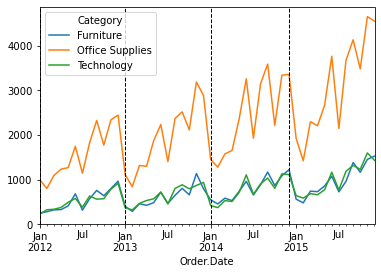

In [55]:
#Plot by category

monthly_orders = orders.groupby(['Category', pd.Grouper(key='Order.Date', freq='M')])['Quantity'].sum() \
        .reset_index().pivot(index='Order.Date', columns='Category', values='Quantity')

mo = monthly_orders.plot()

xposition = [pd.to_datetime('2012-01-01'), pd.to_datetime('2013-01-01'), pd.to_datetime('2014-01-01'), pd.to_datetime('2014-12-31')]
for xc in xposition:
    mo.axvline(x=xc, color='k', linestyle='--', lw=1)

In [9]:
# Problem 3
# Combine DFs into one
returns.rename(columns = {'Order ID':'Order.ID'}, inplace = True)
combined = pd.merge(orders, returns, on = 'Order.ID')

In [10]:
combined.head()

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority,Returned,Region_y
0,30191,IN-2012-PB19210127-41259,2012-12-16,2012-12-19,First Class,PB-19210127,Phillip Breyer,Corporate,NaN,Taipei,...,Tables,"Lesro Conference Table, with Bottom Storage","$1,715.16",2,0.0,720.36,725.57,Critical,Yes,Eastern Asia
1,30190,IN-2012-PB19210127-41259,2012-12-16,2012-12-19,First Class,PB-19210127,Phillip Breyer,Corporate,NaN,Taipei,...,Bookcases,"Safco Classic Bookcase, Pine","$2,197.50",5,0.0,153.75,627.27,Critical,Yes,Eastern Asia
2,30187,IN-2012-PB19210127-41259,2012-12-16,2012-12-19,First Class,PB-19210127,Phillip Breyer,Corporate,NaN,Taipei,...,Tables,"Lesro Round Table, with Bottom Storage","$1,356.03",3,0.0,311.85,458.97,Critical,Yes,Eastern Asia
3,30193,IN-2012-PB19210127-41259,2012-12-16,2012-12-19,First Class,PB-19210127,Phillip Breyer,Corporate,NaN,Taipei,...,Chairs,"Office Star Swivel Stool, Adjustable",$882.15,5,0.0,114.60,203.92,Critical,Yes,Eastern Asia
4,30189,IN-2012-PB19210127-41259,2012-12-16,2012-12-19,First Class,PB-19210127,Phillip Breyer,Corporate,NaN,Taipei,...,Machines,"Okidata Calculator, Red",$148.32,3,0.0,68.22,25.48,Critical,Yes,Eastern Asia


In [ ]:
combined.loc[combined['Returned'] == 'Yes'].groupby(combined['Order.Date'].map(lambda x: x.year)).agg({'Profit' : ['sum']})

In [ ]:
combined.loc[combined['Returned'] == 'Yes'].groupby('Customer.ID').agg({'Returned' : 'count'}).sort_values(by = 'Returned', axis = 0, ascending = False)

### Part 2

In [23]:
orders['Returned'] = orders['Order.ID'].isin(returns['Order.ID']).to_list()

In [26]:
def binary (row):
    if row == True:
        return 1
    else:
        return 0

In [29]:
orders['Returned'] = orders['Returned'].apply(binary) #Step 1

In [49]:
orders['ProcessTime'] = orders['Ship.Date'] - orders['Order.Date'] #Step 2

In [36]:
orders.drop('ProcessingTime', axis=1, inplace = True) #Clean column

In [38]:
pd.set_option('display.max_columns', None)
orders.head()

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,State,Country,Region,Market,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority,Returned,ProcessTime
0,40098,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,Oklahoma,United States,Central US,USCA,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,$221.98,2,0.0,62.15,40.77,High,0,2 days
1,26341,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,New South Wales,Australia,Oceania,Asia Pacific,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black","$3,709.40",9,0.1,-288.77,923.63,Critical,0,2 days
2,25330,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,Queensland,Australia,Oceania,Asia Pacific,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID","$5,175.17",9,0.1,919.97,915.49,Medium,0,1 days
3,13524,ES-2014-KM1637548-41667,2014-01-28,2014-01-30,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,Berlin,Germany,Western Europe,Europe,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless","$2,892.51",5,0.1,-96.54,910.16,Medium,0,2 days
4,47221,SG-2014-RH9495111-41948,2014-11-05,2014-11-06,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,Dakar,Senegal,Western Africa,Africa,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed","$2,832.96",8,0.0,311.52,903.04,Critical,0,1 days


In [41]:
returned_ID = orders.loc[orders['Returned']==1].groupby('Product.ID')[['Order.ID']].agg('count').to_dict()['Order.ID']

In [42]:
orders['ReturnedCount'] = orders['Product.ID'].map(returned_ID) # Problem 3

In [88]:
orders['Sales'] = orders['Sales'].apply(lambda x: x.replace('$', '').replace(',',''))

In [139]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(orders.loc[:, orders.columns != 'Returned'], orders['Returned'], random_state=2003)

In [140]:
from sklearn_pandas import DataFrameMapper
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder

mapper = DataFrameMapper([
    (['Ship.Mode'],[SimpleImputer(strategy='most_frequent'), OrdinalEncoder(), StandardScaler()]),
    (['Sub.Category'], [SimpleImputer(strategy='most_frequent'), LabelBinarizer()]),
    (['Market'], [SimpleImputer(strategy='most_frequent'), LabelBinarizer()]),
    (['Sales'],[SimpleImputer(strategy='median'), StandardScaler()]),
    (['Order.Priority'],[SimpleImputer(strategy='most_frequent'), OrdinalEncoder()]),
    ], df_out=True)

In [141]:
pipe = Pipeline([
    ('map', mapper),
])

In [142]:
pipe = pipe.fit(X_train)
X_train = pipe.transform(X_train)
X_train.sample(5)

,Ship.Mode,Sub.Category_Accessories,Sub.Category_Appliances,Sub.Category_Art,Sub.Category_Binders,Sub.Category_Bookcases,Sub.Category_Chairs,Sub.Category_Copiers,Sub.Category_Envelopes,Sub.Category_Fasteners,Sub.Category_Furnishings,Sub.Category_Labels,Sub.Category_Machines,Sub.Category_Paper,Sub.Category_Phones,Sub.Category_Storage,Sub.Category_Supplies,Sub.Category_Tables,Market_Africa,Market_Asia Pacific,Market_Europe,Market_LATAM,Market_USCA,Sales,Order.Priority
37025,0.687215,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.139352,3.0
28992,0.687215,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.438908,3.0
33820,-2.080472,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.472774,3.0
15582,0.687215,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.079741,2.0
30496,0.687215,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.697139,3.0


In [143]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(C=1e4)
# logistic.fit(X_train, y_train)

In [144]:
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

kf5 = StratifiedKFold(n_splits=5, shuffle=True, random_state = 2003)

ss = StandardScaler()
Xs_train = ss.fit_transform( X_train )

params_logit = [ {'C':[1, 10, 100, 1000]} ]

grid_logistic = GridSearchCV( estimator = logistic, param_grid = params_logit, cv = kf5)

grid_logistic.fit(Xs_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=2003, shuffle=True),
             estimator=LogisticRegression(C=10000.0),
             param_grid=[{'C': [1, 10, 100, 1000]}])

In [145]:
grid_logistic.best_params_

{'C': 1}

In [146]:
grid_logistic.best_score_

0.9564041944829071

In [147]:
final_model = grid_logistic.best_estimator_

In [148]:
pipe_1 = pipe.fit(X_test)
X_test = pipe_1.transform(X_test)

In [149]:
Xs_test = ss.transform( X_test )

In [151]:
final_model.score( Xs_test, y_test)

0.957654215082274

In [152]:
final_model.coef_

array([[ 0.05909188, -0.01839961, -0.03231798,  0.02881398,  0.00028693,
        -0.00296749, -0.00847279,  0.0087304 ,  0.00108098, -0.02673766,
        -0.00365326,  0.0514098 ,  0.01281517, -0.01603542,  0.00234862,
         0.00104144, -0.00486055, -0.00077834, -0.05420873,  0.03402873,
        -0.03437861,  0.0100061 ,  0.02663545,  0.00319546, -0.04293203]])